In [1]:
import pandas as pd
import anndata
import numpy
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Parameter

In [2]:
delta_dmr_rate_cutoff = 0.3

In [3]:
# Parameters
delta_dmr_rate_cutoff = 0.3


## Load Data

In [4]:
dmr_hits = anndata.read_h5ad('RelatedClusterAndDMR.hypo_hits.h5ad')
dmr_hits = pd.DataFrame(dmr_hits.X.astype(bool).todense(), index=dmr_hits.obs_names, columns=dmr_hits.var_names)
dmr_hits.head()

index,CLA_Bcl11a,CLA_Cdh8,CLA_Nrp2,EP_Adcy8,EP_Rgs8,EP_Tspan5,IT-L23_Cux1,IT-L23_Foxp1,IT-L23_Ptprt,IT-L23_Tenm2,...,IT-L6_Oxr1,PT-L5_Abca12,PT-L5_Astn2,PT-L5_Kcnh1,PT-L5_Nectin1,PT-L5_Plcb4,PT-L5_Ptprt,PT-L5_Tenm2,PT-L5_Tmtc2,PT-L5_Unc5b
index,,,,,,,,,,,,,,,,,,,,,
Subchr1_15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
Subchr1_96,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Subchr1_105,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,True,True,False,False,False
Subchr1_133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
Subchr1_135,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


In [5]:
dmr_rate = pd.read_msgpack('RelatedClusterAndDMR.mcg_rate.msg')
dmr_rate.head()

,CLA_Bcl11a,CLA_Cdh8,CLA_Nrp2,EP_Adcy8,EP_Rgs8,EP_Tspan5,IT-L23_Cux1,IT-L23_Foxp1,IT-L23_Ptprt,IT-L23_Tenm2,...,IT-L6_Oxr1,PT-L5_Abca12,PT-L5_Astn2,PT-L5_Kcnh1,PT-L5_Nectin1,PT-L5_Plcb4,PT-L5_Ptprt,PT-L5_Tenm2,PT-L5_Tmtc2,PT-L5_Unc5b
index,,,,,,,,,,,,,,,,,,,,,
Subchr1_15,0.666667,0.970149,0.919355,1.000000,0.942857,0.928571,0.672566,0.653846,0.714286,0.826087,...,0.857143,1.000000,1.000000,0.806452,0.408163,0.717949,0.820513,0.703704,0.264706,0.950000
Subchr1_96,0.307692,0.529412,0.823529,0.583333,0.619048,0.608696,0.101449,0.216667,0.301887,0.237288,...,0.545455,0.428571,0.333333,0.366667,0.500000,0.608696,0.923077,0.793103,0.812500,0.916667
Subchr1_105,1.000000,0.900000,0.968750,0.900000,0.851852,0.866667,0.744681,0.516129,0.347826,0.513514,...,0.954545,0.827586,0.809524,0.968254,0.826087,0.536585,0.337838,0.828947,0.760000,0.913043
Subchr1_133,0.933333,0.868421,0.914286,0.923077,0.882353,0.962963,0.842105,0.935484,0.844444,0.869565,...,0.888889,1.000000,0.526316,0.228571,0.789474,0.947368,0.843750,0.906977,0.000000,1.000000
Subchr1_135,1.000000,0.756757,0.904762,0.950000,0.857143,0.958333,0.416667,0.145455,0.652174,0.580000,...,0.111111,0.857143,1.000000,0.736842,0.529412,0.869565,0.925926,0.976744,0.136364,1.000000


In [6]:
dmg = pd.read_msgpack('RelatedDMG.msg')
dmg['cluster_from'] = dmg['cluster_from'].str.replace(' ', '_')
dmg['cluster_to'] = dmg['cluster_to'].str.replace(' ', '_')
print(dmg.shape)
dmg.head()

(16377, 9)


,pvals_adj,gene_id,cluster_from,cluster_to,gene_name,-lgp,AUROC,rate_from,rate_to
7,6.873489e-238,ENSMUSG00000000861.15,IT-L5_Etv1,IT-L5_Cdh8,Bcl11a,237.162823,0.927148,0.009191,0.030186
12,1.793568e-272,ENSMUSG00000003534.17,IT-L23_Foxp1,IT-L5_Etv1,Ddr1,271.746282,0.956907,0.008138,0.040823
52,2.891976e-217,ENSMUSG00000029638.17,IT-L23_Foxp1,IT-L5_Etv1,Glcci1,216.538805,0.907395,0.009993,0.024370
4,0.000000e+00,ENSMUSG00000030657.11,IT-L5_Etv1,IT-L23_Foxp1,Xylt1,1000.000000,0.991323,0.008973,0.025227
26,3.437426e-272,ENSMUSG00000000861.15,IT-L5_Etv1,IT-L23_Foxp1,Bcl11a,271.463767,0.956643,0.009191,0.030269


In [7]:
corr = pd.read_msgpack('RelatedCorr.msg')
corr.head()

,DMR,Gene,Corr,chrom,DMR_to_gene_dist
0,Subchr1_3352,ENSMUSG00000025905.13,0.417337,chr1,-492655.5
1,Subchr1_3410,ENSMUSG00000025905.13,0.393337,chr1,-451807.0
2,Subchr1_3502,ENSMUSG00000025905.13,0.343135,chr1,-386092.0
3,Subchr1_3521,ENSMUSG00000025905.13,0.425302,chr1,-373757.5
4,Subchr1_3545,ENSMUSG00000025905.13,0.342158,chr1,-358910.0


In [8]:
# subset the dmr and dmg based on corr
dmr_hits = dmr_hits.loc[corr['DMR'].unique()].copy()
dmr_rate = dmr_rate.loc[corr['DMR'].unique()].copy()
dmg = dmg[dmg['gene_id'].isin(corr['Gene'].unique())].copy()

In [9]:
dmg[['cluster_from', 'cluster_to']].drop_duplicates().shape

(696, 2)

## prepare DMR pairwise

In [10]:
pairwise_dmr_index = {}
n = 0
for _, (cluster_from, cluster_to) in dmg[['cluster_from', 'cluster_to']].drop_duplicates().iterrows():
    n += 1
    if n % 1000 == 0:
        print(n)
    # cluster_from is hypo, cluster_to is hyper
    rate_delta = (dmr_rate[cluster_to] - dmr_rate[cluster_from]) > delta_dmr_rate_cutoff
    # cluster_to is not hypo, cluster_from is hypo, and rate_delta > delta_dmr_rate_cutoff
    total_judge = (~dmr_hits[cluster_to]) & dmr_hits[cluster_from] & rate_delta
    
    # remaining dmr is sig hypo in cluster_from and hyper in cluster_to
    pairwise_dmr_index[(cluster_from, cluster_to)] = total_judge[total_judge].index

## final DMG DMR for pairwise cluster

In [11]:
related_genes = pd.read_csv('related_dmgs.txt', header=None, index_col=0).index
related_genes.name = 'gene_id'
# create a table to store all related genes
gene_dmr_counts = pd.DataFrame([], index=related_genes)

In [12]:
with pd.HDFStore('FinalDMGDMR.h5') as f:
    n = 0
    for (cluster_from, cluster_to), cluster_pair_df in dmg.groupby(
        ['cluster_from', 'cluster_to']):
        n += 1
        if n % 500 == 0:
            print(n)
        # first get related dmr and dmg separately
        cluster_pair_related_dmr = pairwise_dmr_index[(cluster_from, cluster_to)]
        cluster_pair_related_gene = cluster_pair_df['gene_id'].unique()
        
        # use them to filter corr
        cluster_pair_related_corr = corr[
            corr['DMR'].isin(cluster_pair_related_dmr)
            & corr['Gene'].isin(cluster_pair_related_gene)]
        
        # then use remained dmr and dmg as final list
        # the remaining DMR DMG is:
        # - sig hypo in one clsuter compare to another
        # - have sig correlateion
        cluster_pair_related_dmr = pd.Series(cluster_pair_related_corr['DMR'].unique())
        cluster_pair_related_gene = pd.Series(cluster_pair_related_corr['Gene'].unique())
        # print(cluster_from, cluster_to, cluster_pair_related_dmr.size, cluster_pair_related_gene.size)
        f[f'{cluster_from}/{cluster_to}/DMR'] = cluster_pair_related_dmr
        f[f'{cluster_from}/{cluster_to}/Gene'] = cluster_pair_related_gene
        f[f'{cluster_from}/{cluster_to}/Corr'] = pd.Series(cluster_pair_related_corr.index)
        
        gene_counts = cluster_pair_related_corr['Gene'].value_counts()
        gene_dmr_counts[(cluster_from, cluster_to)] = gene_counts.reindex(
            related_genes).fillna(0).astype(int)

500


## Save DMG DMR counts table

In [13]:
gene_pos = (gene_dmr_counts > 0).sum(axis=1)
gene_dmr_counts = gene_dmr_counts[gene_pos > 0].copy()
gene_dmr_counts.to_msgpack('DMRCounts_for_DMG_in_cluster_pairs.msg')
gene_dmr_counts.shape

(548, 696)

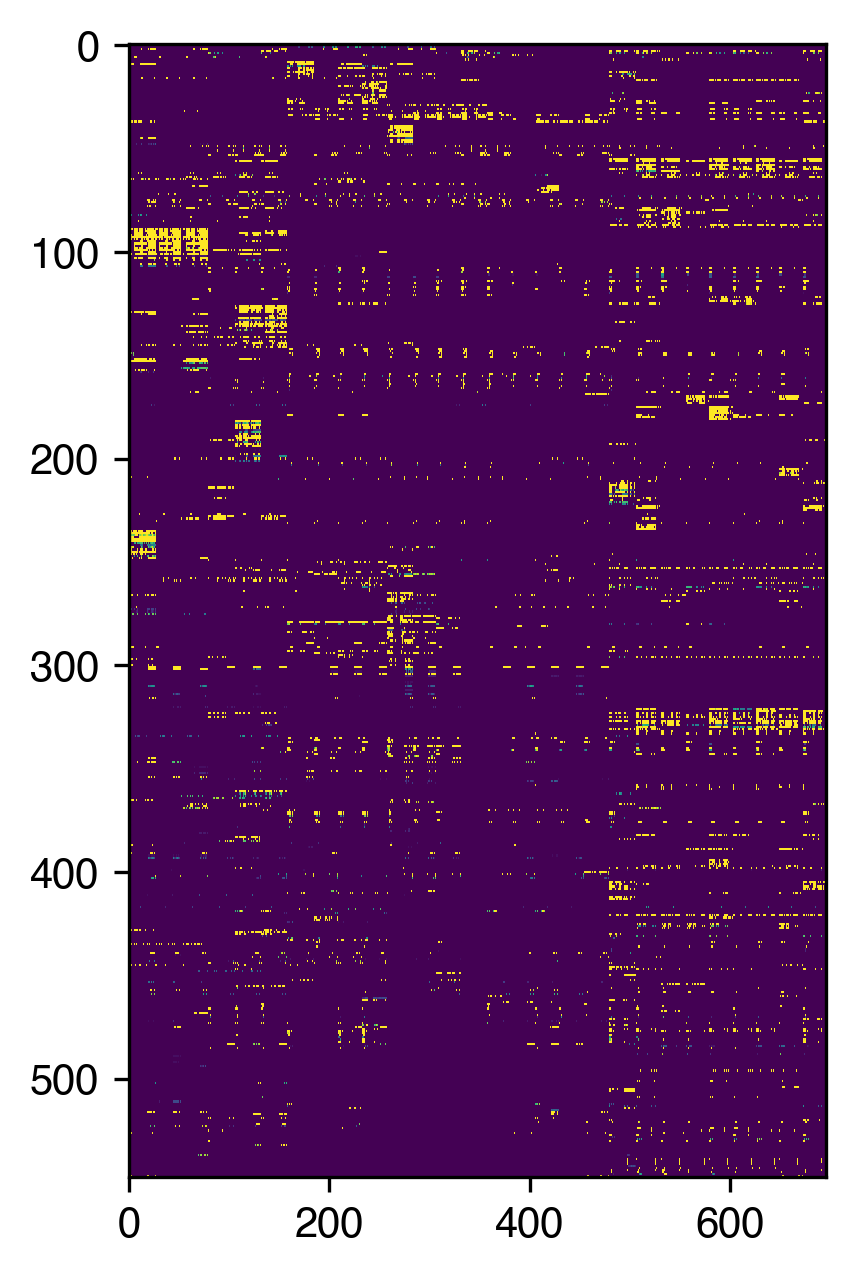

In [14]:
plt.figure(figsize=(3, 5), dpi=300)
plt.imshow(gene_dmr_counts.values, vmin=3, vmax=30, aspect='auto')